# <div style="text-align: center;">**Simplifying Image Drawing**</div>

### Libraries used

In [22]:
import pandas as pd

from tqdm import tqdm

import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Import sklearn objects
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.decomposition import PCA

# Image helper libraries
from PIL import Image

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ignore any Deprication, Future or User Warnings:

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# *Load a Sample Image*

In [13]:
img = Image.open('images/image_1.jpg').convert('RGB')
img = np.array(img)

Plot the Image

(-0.5, 4031.5, 2267.5, -0.5)

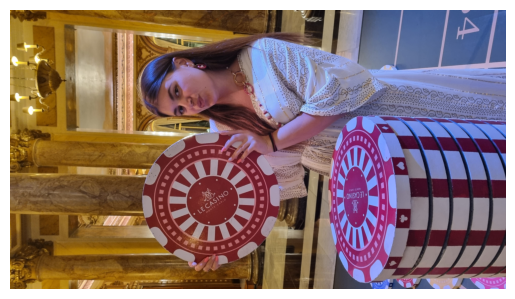

In [14]:
plt.imshow(img)
plt.axis('off')

# *Modelling*

## K-Means

In [15]:
def image_cluster_kmeans(img, k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy() # create a copy of the image

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i] # change labels to cluster centers
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_

In [19]:
k_vals = list(range(2,21,2))
img_list = []
inertia = []
for k in tqdm(k_vals):
    img2, ine = image_cluster_kmeans(img,k) # call the function with k=k
    img_list.append(img2)
    inertia.append(ine)  

100%|██████████| 10/10 [19:58<00:00, 119.87s/it]


Text(0, 0.5, 'Inertia')

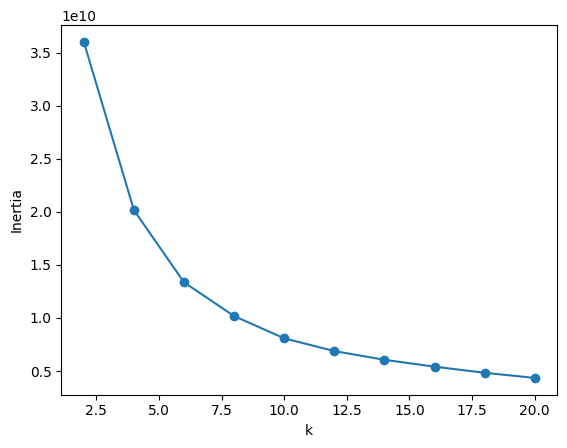

In [20]:
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia')

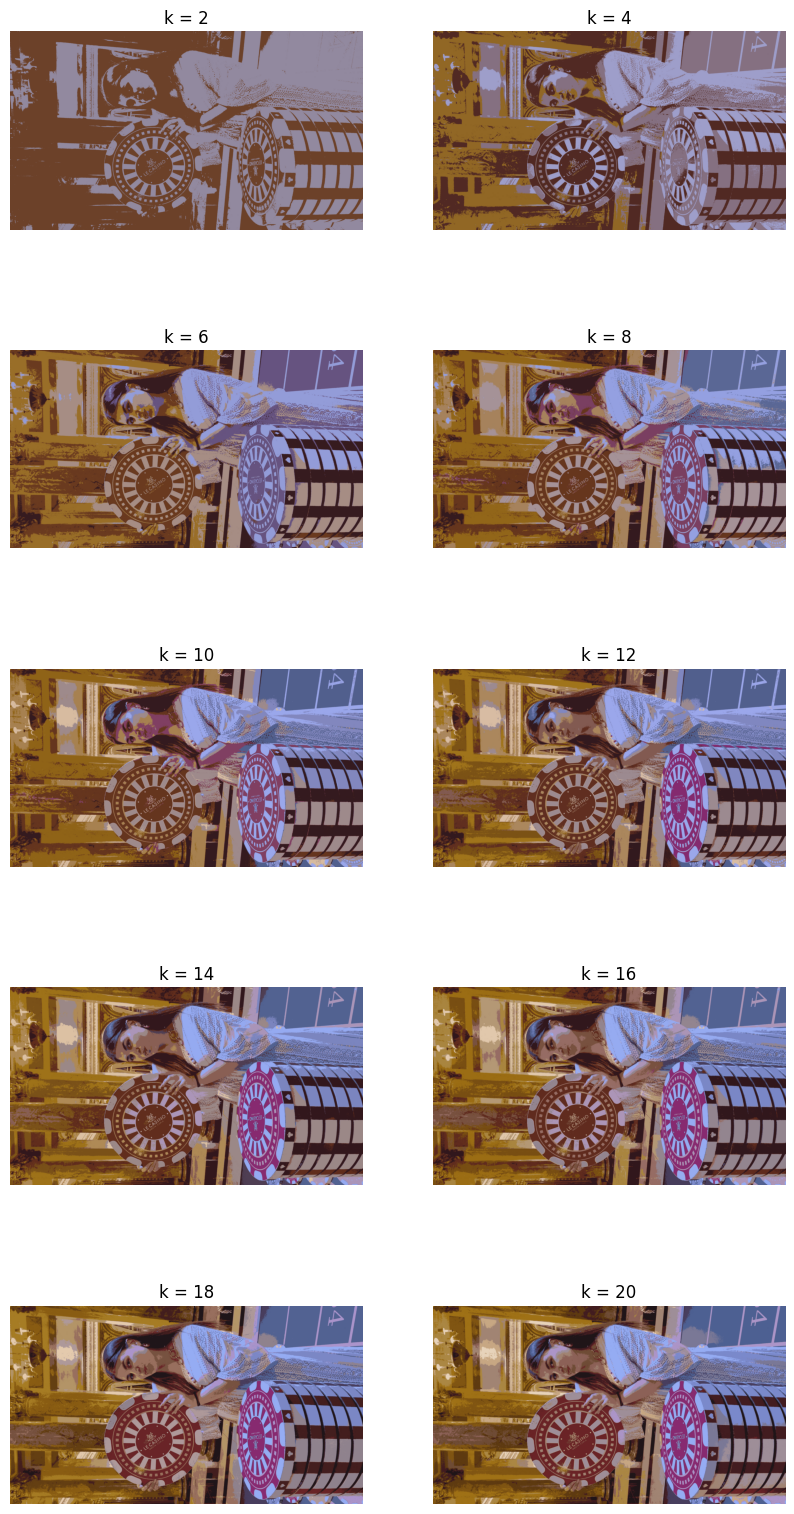

In [21]:
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off')

In [45]:
def dimensionality_reduction_PCA(picture):
    picture = picture.reshape(-1,1)
    pca = PCA(svd_solver='full').fit(picture)
    pca_reduced = PCA(svd_solver='full').fit_transform(picture)
    reduced_data = pd.DataFrame(pca_reduced, columns=[f'Component {i}' for i in range(pca_reduced.shape[1])])
    fig = plt.plot(pca.explained_variance_ratio_.cumsum())
    return reduced_data, fig

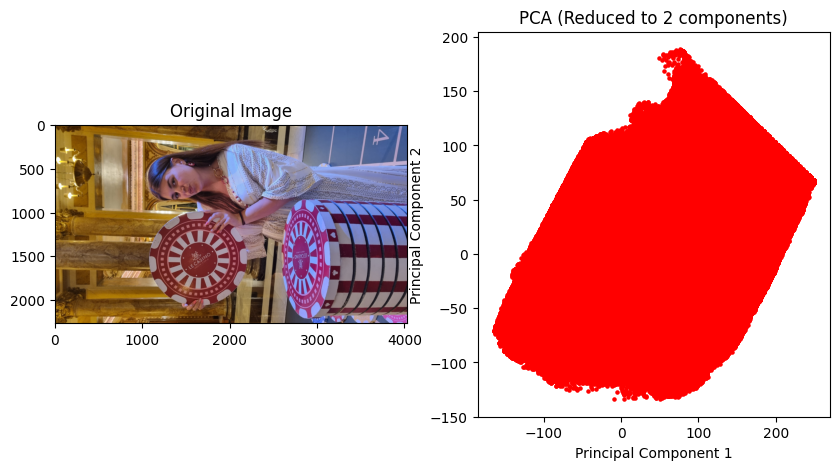

In [50]:
height, width, channels = img.shape
flattened_array = img.reshape((height * width, channels))

# Apply PCA for dimensionality reduction
n_components = 2  # Number of principal components to keep
pca = PCA(n_components=n_components)
transformed_array = pca.fit_transform(flattened_array)

# Inverse transform to get back the reduced data to the original space (optional)
reconstructed_array = pca.inverse_transform(transformed_array).reshape((height, width, channels))

# Plot the original and reduced data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.scatter(transformed_array[:, 0], transformed_array[:, 1], c='r', s=5)
plt.title(f'PCA (Reduced to {n_components} components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 4031.5, 2267.5, -0.5)

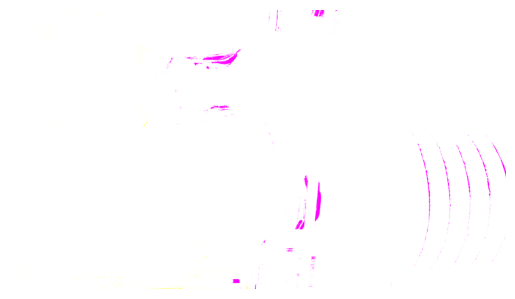

In [53]:
plt.imshow(reconstructed_array)
plt.axis('off')

In [46]:
reduced_data, fig = dimensionality_reduction_PCA(img)

ValueError: Found array with dim 3. PCA expected <= 2.

In [44]:
reduced_data

,Component 0
0,55.361996
1,6.361996
2,-95.638004
3,48.361996
4,-0.638004
...,...
27433723,51.361996
27433724,130.361996
27433725,61.361996
27433726,50.361996
